# Feature Selection

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import featuretools as ft
import scipy.stats as ss
import math 

from scipy import stats
from collections import Counter
from pathlib import Path

%matplotlib inline

sns.set(style="ticks")

## Dataset

In [3]:
DATASET = Path("datasets/lotto/data_processed_2.csv")

# The Answer to the Ultimate Question of Life, the Universe, and Everything.
np.random.seed(42)

In [4]:
# Read into data frame
dataset = pd.read_csv(DATASET, header=0, sep=',', quotechar='"', parse_dates=['DrawDate'], dtype={'PrizeType': str})

In [5]:
dataset.columns

Index(['LuckyNo', '1st_digit', '2nd_digit', '3rd_digit', '4th_digit',
       'PrizeType', 'DrawNo', 'DaysSinceLastExactMatch',
       'DaysUntilNextExactMatch', 'DaysSinceLastAnyMatch',
       'DaysUntilNextAnyMatch', 'DrawYear', 'DrawMonth', 'DrawWeek',
       'DrawDayofweek', 'DrawDayofyear', 'CumProbaExactMatch',
       'CumProbaAnyMatch', 'DrawDate', 'TotalMean', '1stDigitMean',
       '2ndDigitMean', '3rdDigitMean', '4thDigitMean'],
      dtype='object')

In [6]:
dataset.sample(3)

,LuckyNo,1st_digit,2nd_digit,3rd_digit,4th_digit,PrizeType,DrawNo,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,...,DrawDayofweek,DrawDayofyear,CumProbaExactMatch,CumProbaAnyMatch,DrawDate,TotalMean,1stDigitMean,2ndDigitMean,3rdDigitMean,4thDigitMean
34923,599,0,5,9,9,ConsolationNo6,192601,98,2863,6,...,5,335,0.05,0.49,2001-12-01,4982.462490,4.481495,4.513267,4.516272,4.477832
83006,73,0,0,7,3,SpecialNo9,401614,140,729,28,...,5,46,0.09,1.10,2014-02-15,4977.331864,4.478225,4.495958,4.503813,4.473189
57030,4369,4,3,6,9,SpecialNo1,288707,930,967,10,...,5,237,0.10,1.33,2007-08-25,4978.500894,4.478927,4.500596,4.503576,4.478454


In [7]:
df = dataset.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104673 entries, 0 to 104672
Data columns (total 24 columns):
LuckyNo                    104673 non-null int64
1st_digit                  104673 non-null int64
2nd_digit                  104673 non-null int64
3rd_digit                  104673 non-null int64
4th_digit                  104673 non-null int64
PrizeType                  104673 non-null object
DrawNo                     104673 non-null int64
DaysSinceLastExactMatch    104673 non-null int64
DaysUntilNextExactMatch    104673 non-null int64
DaysSinceLastAnyMatch      104673 non-null int64
DaysUntilNextAnyMatch      104673 non-null int64
DrawYear                   104673 non-null int64
DrawMonth                  104673 non-null int64
DrawWeek                   104673 non-null int64
DrawDayofweek              104673 non-null int64
DrawDayofyear              104673 non-null int64
CumProbaExactMatch         104673 non-null float64
CumProbaAnyMatch           104673 non-null float64
Dr

In [9]:
corr_matrix = df.corr()
corr_matrix['LuckyNo'].sort_values(ascending=False)

LuckyNo                    1.000000
1st_digit                  0.994971
2nd_digit                  0.098613
TotalMean                  0.010611
1stDigitMean               0.010482
3rd_digit                  0.010338
2ndDigitMean               0.006560
DaysUntilNextExactMatch    0.005985
DaysSinceLastExactMatch    0.005985
DrawDayofweek              0.004380
DaysUntilNextAnyMatch      0.003307
4thDigitMean               0.002701
DaysSinceLastAnyMatch      0.002328
3rdDigitMean               0.001825
4th_digit                  0.001711
DrawWeek                  -0.002762
DrawDayofyear             -0.002896
DrawMonth                 -0.002985
DrawYear                  -0.003071
DrawNo                    -0.003218
CumProbaAnyMatch          -0.003994
CumProbaExactMatch        -0.009410
Name: LuckyNo, dtype: float64

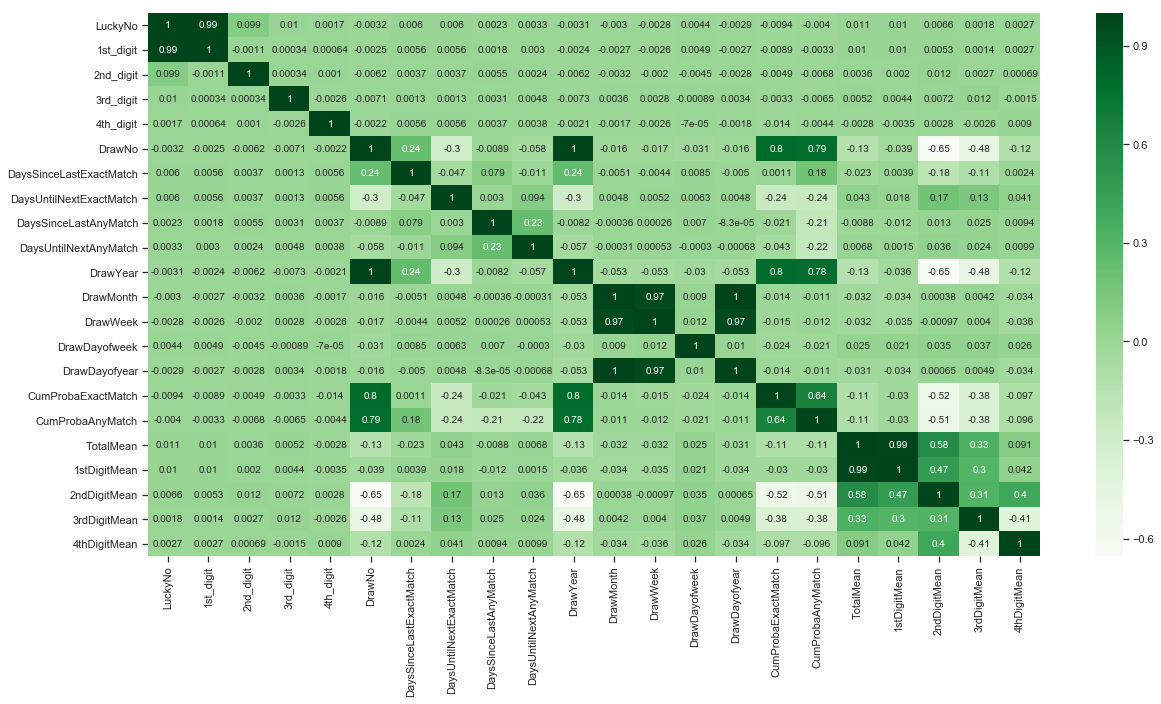

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Greens)
plt.show()

In [43]:
num_attrs = ["TotalMean", "1stDigitMean", "2ndDigitMean", 
            "DaysUntilNextExactMatch", "DaysSinceLastExactMatch",
            "DrawDayofweek", "DaysUntilNextAnyMatch",
            "4thDigitMean", "DaysSinceLastAnyMatch",
            "3rdDigitMean", "DrawWeek", "DrawDayofyear", "DrawMonth"
            ]
cat_attrs = ["PrizeType"]
target_label = ["LuckyNo"]